In [2]:
%pip install osmnx

Note: you may need to restart the kernel to use updated packages.


In [3]:
import osmnx as ox

In [40]:
city_name="Greifswald, Germany"
area=ox.geocode_to_gdf(city_name)

tags={"highway" : True}
area=ox.features_from_place(city_name, tags)


In [41]:
for key in area.keys():
    if(key!="geometry" and key !="highway" and key!="addr:street"):
        print(key)
        area=area.drop(columns=key)
#area.drop(columns=["traffic_signals:direction","crossing"])

created_by
traffic_signals:direction
crossing
crossing:markings
kerb
tactile_paving
crossing:island
button_operated
traffic_signals
traffic_signals:sound
traffic_signals:vibration
direction
traffic_calming
traffic_signals:foot
noexit
crossing_ref
turning_circle
check_date:crossing
bicycle
crossing:signals
name
public_transport
route_ref
wheelchair
bench
bin
bus
covered
departures_board
lit
passenger_information_display
shelter
ref
surface
operator
source
check_date:shelter
maxspeed
man_made
mapillary
speed_camera
ferry
light_rail
monorail
subway
train
tram
trolleybus
supervised
network
note
stop
toilets:wheelchair
lamp_type
red_turn:right
traffic_sign
traffic_sign:direction
lamp_model
ref:signed
lamp_mount
support
brand
elevator
indoor
length
level
width
ref:manufacturer_inventory
ref:operator_inventory
addr:city
addr:country
addr:housenumber
addr:postcode
height
construction
check_date
emergency_telephone_code
camera:direction
camera:mount
camera:type
surveillance
surveillance:type
su

In [42]:
import math
for a in area["addr:street"]:
    if(type(a)==str):
        print(a, type(a))

Loitzer Straße <class 'str'>


In [14]:
for a in area:
    print(a)

geometry
highway
addr:street


In [86]:
g=ox.graph_from_place(city_name)

In [96]:
for edge in g.edges():
    print(edge[1])

3350149574
12781538
12781578
1351890878
6023403235
500946311
298906631
4221220306
305534185
298906631
321604655
623505692
323868549
4467375432
618320636
4248318312
4248318313
3768509926
3128240690
3128240936
3128240719
12781532
1455013326
12781530
12781586
3128240940
3128240949
3128240936
344441368
3350149549
1569171490
3350149546
3350149584
12781575
12008811
3350149584
3350149568
344441417
344441392
3128240711
3128240649
12971006774
267110776
1455013326
3128240645
12781583
1456116286
1456116286
1456116288
12970713694
12970720514
3128241204
3350149899
12781571
324022474
1456116288
3350149898
12781568
12781575
12781538
3350149897
1456116284
12781571
3350149548
12008811
1569171502
12781563
12447214086
12447214090
344441417
3128240992
12781532
1569171627
3128241203
324022236
3128241197
324022474
3128241194
3128241203
3128241204
3216730147
503565268
3763980990
3763980978
4696980915
510789487
29684755
3144240773
276855402
5027796908
276855402
269425771
269425771
110047768
110074100
30613547

Knud-Rasmussen-Straße
Knud-Rasmussen-Straße
Mönchguter Weg
Koitenhäger Landstraße
Koitenhäger Landstraße
Koitenhäger Landstraße
Koitenhäger Landstraße
Ernteweg
Rigaer Straße
Koitenhäger Landstraße
Koitenhäger Landstraße
Lindenstraße
Vitus-Bering-Straße
Vitus-Bering-Straße
Roald-Amundsen-Straße
Vitus-Bering-Straße
Roald-Amundsen-Straße
Roald-Amundsen-Straße
Roald-Amundsen-Straße
Vitus-Bering-Straße
Vitus-Bering-Straße
Vitus-Bering-Straße
Alfred-Wegener-Straße
Alfred-Wegener-Straße
Fridtjof-Nansen-Straße
Fridtjof-Nansen-Straße
Knud-Rasmussen-Straße
Knud-Rasmussen-Straße
Poeler Weg
Poeler Weg
Fridtjof-Nansen-Straße
Fridtjof-Nansen-Straße
Vitus-Bering-Straße
Roald-Amundsen-Straße
Darßer Weg
Roald-Amundsen-Straße
Roald-Amundsen-Straße
Roald-Amundsen-Straße
Wittower Weg
Wittower Weg
Wittower Weg
Wittower Weg
Knud-Rasmussen-Straße
Am Ryck
Am Ryck
Knud-Rasmussen-Straße
Wittower Weg
Knud-Rasmussen-Straße
Knud-Rasmussen-Straße
Knud-Rasmussen-Straße
Jasmunder Weg
Jasmunder Weg
Knud-Rasmussen-Stra

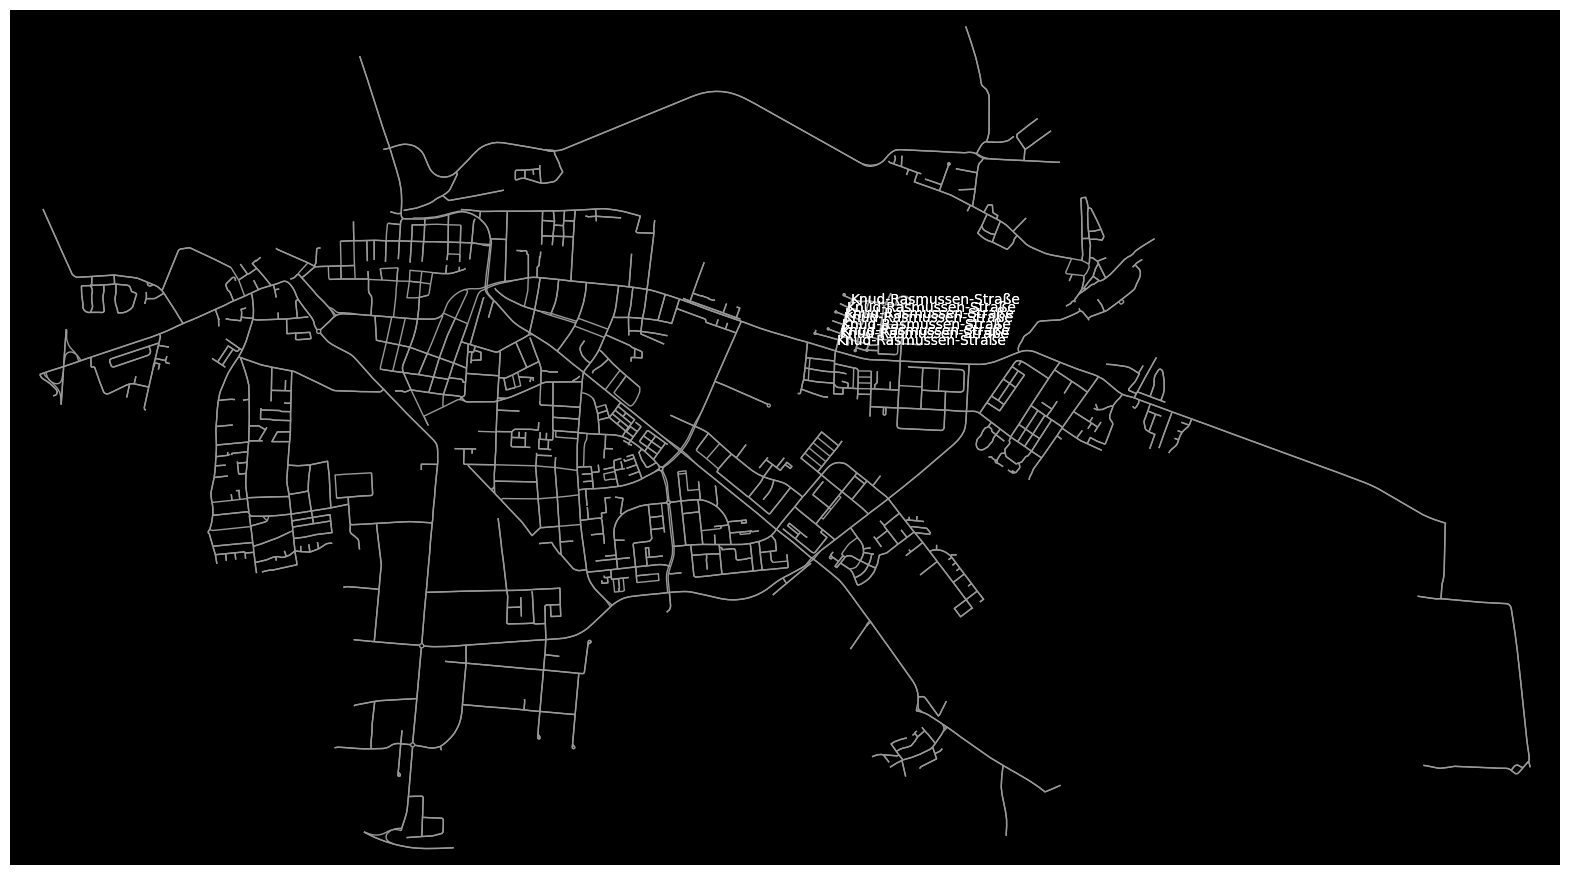

In [3]:
import matplotlib.pyplot as plt
import osmnx as ox

G = ox.graph_from_place('Greifswald, Germany', network_type='drive')
#G = ox.get_undirected(G)
names=[]
edges=[]

fig, ax = ox.plot_graph(G, bgcolor='k', edge_linewidth=1, node_size=0,
                        show=False, close=False, figsize=[20,20])
gdf=ox.graph_to_gdfs(G, nodes=False).fillna('').iterrows()
for _, edge in gdf:
    edges.append(edge)
    c = edge['geometry'].centroid
    text = edge['name']
    names.append(text)
    print(text)
    if(text=="Knud-Rasmussen-Straße"):
        ax.annotate(text, (c.x, c.y), c='w')
plt.show()

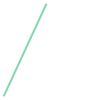

In [58]:
edges[0]["geometry"].centroid
edges[1]["geometry"]

In [3]:
import shapely 
shapely.line_merge([edges[0]["geometry"],edges[1]["geometry"]])

array([<LINESTRING (13.424 54.092, 13.425 54.093)>,
       <LINESTRING (13.424 54.092, 13.424 54.092)>], dtype=object)

In [4]:
def look_if_exists(dat,data):
    for i in range(len(data)):
        if(dat==data[i]):
            return (True,i)
        
    return (False, -1)


names=[]
lines=[]

merged_lines=[]

for edge in edges:
    name=edge["name"]
    geom=edge["geometry"]
    #print(name, geom)
    exists,index=look_if_exists(name,names)
    if(not(exists)):
        names.append(name)
        lines.append([geom])
        #print(geom)
        #print(lines[-1][0])
    else:
        #print(index)
        lines[index].append(geom)
    #if(len(lines)>2):
        #print("end",lines[2])
#for line in lines:
#    merged_lines.append(shapely.line_merge(shapely.MultiLineString(line)))



Fridtjof-Nansen-Straße
Axes(0,0;1x1)
POINT (13.42542537909427 54.09137918580256)
POINT (13.424515819663275 54.09157813755202)
POINT (13.426425836390282 54.09243901146974)
POINT (13.426164466620387 54.092002496304275)
POINT (13.42661305 54.092789550000006)
POINT (13.426906867766863 54.0933815943795)
POINT (13.426906867766862 54.093381594379494)
POINT (13.426164466620387 54.09200249630428)
POINT (13.425979534399207 54.09150727333012)
POINT (13.42661305 54.092789550000006)
POINT (13.426425836390282 54.09243901146974)
POINT (13.42597953439921 54.09150727333013)
POINT (13.425425379094266 54.091379185802545)
POINT (13.424515819663275 54.09157813755202)


Text(13.339, 54.105, 'Fridtjof-Nansen-Straße')

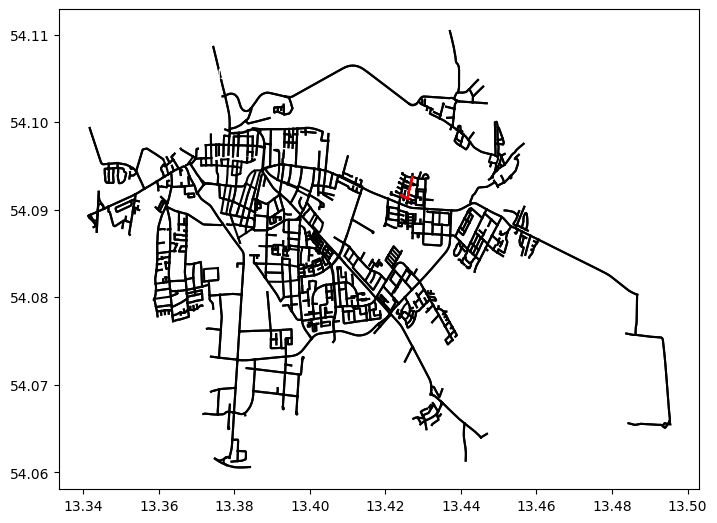

In [21]:
ind=9
print(names[ind])

fig=plt.figure()
fig.add_axes((0,0,1,1))
ax=fig.get_axes()[0]
for j in range(0,len(lines)):
    for i in range(0,len(lines[j])):
        ax.plot(lines[j][i].xy[0],lines[j][i].xy[1],c="k")


#for ind in range(len(lines)):
for i in range(0,len(lines[ind])):
    ax.plot(lines[ind][i].xy[0],lines[ind][i].xy[1],c="r")
    print(lines[ind][i].centroid)
ax.annotate(names[ind], (13.339, 54.105), c='w')

In [60]:
print(lines[2][0])

LINESTRING (13.4243995 54.092331, 13.4242549 54.0923612, 13.423852 54.0924455, 13.4238087 54.0924544, 13.4232883 54.092563)


In [82]:
line=shapely.line_merge(shapely.MultiLineString(rasmussen))

In [84]:
print(line)

MULTILINESTRING ((13.4239408 54.0914019, 13.4240842 54.0916585), (13.4240842 54.0916585, 13.4239408 54.0914019), (13.4239408 54.0914019, 13.4238492 54.0912064, 13.4237828 54.0910648, 13.4237127 54.0908883, 13.4236964 54.0908473, 13.4236448 54.0907265, 13.4236964 54.0908473, 13.4237127 54.0908883, 13.4237828 54.0910648, 13.4238492 54.0912064, 13.4239408 54.0914019), (13.4241478 54.0917863, 13.4240842 54.0916585), (13.4240842 54.0916585, 13.4241478 54.0917863), (13.4243995 54.092331, 13.4241478 54.0917863), (13.4241478 54.0917863, 13.4243995 54.092331), (13.4243995 54.092331, 13.424551 54.0926427), (13.424551 54.0926427, 13.4243995 54.092331), (13.424551 54.0926427, 13.4246506 54.0928756), (13.4246506 54.0928756, 13.424551 54.0926427), (13.4249863 54.0933549, 13.4247736 54.093079, 13.4247071 54.0929757, 13.4246506 54.0928756), (13.4246506 54.0928756, 13.4247071 54.0929757, 13.4247736 54.093079, 13.4249863 54.0933549), (13.4249863 54.0933549, 13.4253518 54.0938598, 13.4249863 54.0933549))

In [151]:
ox.plot_graph?

Signature:
ox.plot_graph(
    G: 'nx.MultiGraph | nx.MultiDiGraph',
    *,
    ax: 'Axes | None' = None,
    figsize: 'tuple[float, float]' = (8, 8),
    bgcolor: 'str' = '#111111',
    node_color: 'str | Sequence[str]' = 'w',
    node_size: 'float | Sequence[float]' = 15,
    node_alpha: 'float | None' = None,
    node_edgecolor: 'str | Iterable[str]' = 'none',
    node_zorder: 'int' = 1,
    edge_color: 'str | Iterable[str]' = '#999999',
    edge_linewidth: 'float | Sequence[float]' = 1,
    edge_alpha: 'float | None' = None,
    bbox: 'tuple[float, float, float, float] | None' = None,
    show: 'bool' = True,
    close: 'bool' = False,
    save: 'bool' = False,
    filepath: 'str | Path | None' = None,
    dpi: 'int' = 300,
) -> 'tuple[Figure, Axes]'
Docstring:
Visualize a graph.

Parameters
----------
G
    Input graph.
ax
    If not None, plot on this pre-existing axes instance.
figsize
    If `ax` is None, create new figure with size `(width, height)`.
bgcolor
    Background colo

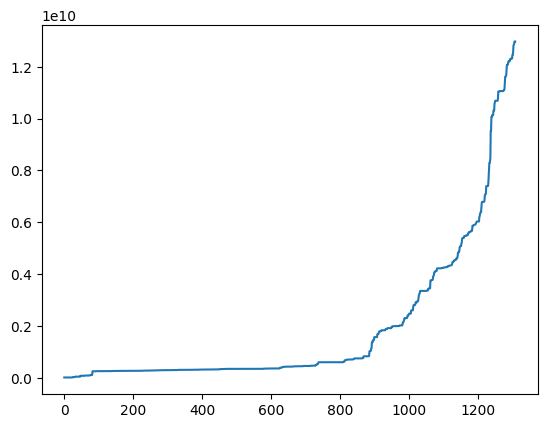

In [161]:
plt.plot(G)